In [1]:
print("Hello world!")

Hello world!


In [8]:
from tinygrad.core import Tensor
from tinygrad.nn import SimpleMLP
from tinygrad.losses import MSELoss, MaxMarginLoss
from tinygrad.optimizers import SimpleSGD

import random
import numpy as np
from sklearn.datasets import make_blobs, make_moons
import matplotlib.pyplot as plt

In [9]:
np.random.seed(1337)
random.seed(1337)

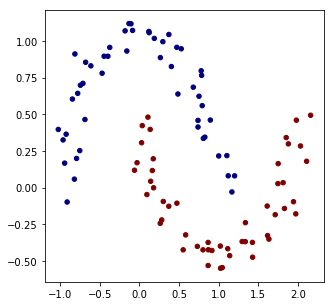

In [10]:
x, y = make_moons(n_samples=100, noise=0.1)

y = y*2 - 1 # make y be -1 or 1

plt.figure(figsize=(5,5))
plt.scatter(x[:,0], x[:,1], c=y, s=20, cmap='jet')
plt.show()

In [11]:
# now we initialize the model
# for demo purposes we initialize a 2, 16, 16, 1 model
model = SimpleMLP(2, 1, [16, 16])

#temporary fix to make last neuron nonlin = False
for i, layer in enumerate(model.layers):
    if i == len(model.layers) - 1:
        for n in layer.neurons:
            n.nonlin = False

In [12]:
model.summary()
print("No of model parameters: ", len(model.parameters()))

SimpleMLP(
Linear(ins:2 outs:16 num_parameters:48)
Linear(ins:16 outs:16 num_parameters:272)
Linear(ins:16 outs:1 num_parameters:17)
)
No of model parameters:  337


In [23]:
epochs = 100
lr = 0.005

# now we define the loss function and optimizers
loss_fn = MSELoss
optim = SimpleSGD(model.parameters(), lr=lr)

X = [list(map(Tensor, _x)) for _x in x] #minor preprocessing
losslist = [] #to store losses

for i in range(epochs):
    
    preds = list(map(model, X))
    
    loss = loss_fn(preds, y)
    
    model.zero_grad()
    loss.backward()
    
    optim.step()
    
    if i%5 == 0:
        print("For epoch: {}, loss: {}".format(i, loss.data))
        losslist.append(loss.data)


For epoch: 0, loss: 0.4339927058376316
For epoch: 5, loss: 0.340361303290028
For epoch: 10, loss: 0.32192742485611553
For epoch: 15, loss: 0.3116074204734967
For epoch: 20, loss: 0.3050716432460593
For epoch: 25, loss: 0.30079516450243765
For epoch: 30, loss: 0.29764716817675413
For epoch: 35, loss: 0.29497468503732044
For epoch: 40, loss: 0.2926127925270366
For epoch: 45, loss: 0.2904082023447237
For epoch: 50, loss: 0.2883981815038747
For epoch: 55, loss: 0.2864884425065395
For epoch: 60, loss: 0.2846373426273181
For epoch: 65, loss: 0.2828138562442489
For epoch: 70, loss: 0.2810860000974384
For epoch: 75, loss: 0.27938780229634935
For epoch: 80, loss: 0.2776012766977584
For epoch: 85, loss: 0.2757993947514394
For epoch: 90, loss: 0.2740693452779297
For epoch: 95, loss: 0.2723485642681791


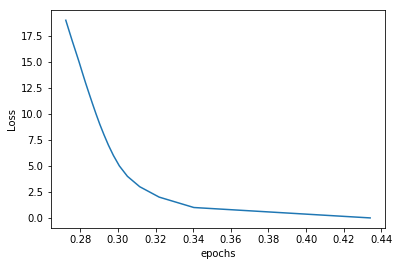

In [25]:
plt.xlabel("epochs")
plt.ylabel("Loss")
plt.plot(losslist, range(len(losslist)))

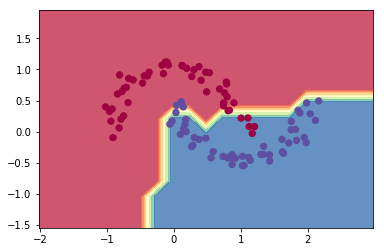

In [26]:
#visualize decision boundary

h = 0.25
x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1
y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Xmesh = np.c_[xx.ravel(), yy.ravel()]
inputs = [list(map(Tensor, xrow)) for xrow in Xmesh]
scores = list(map(model, inputs))
Z = np.array([s.data > 0 for s in scores])
Z = Z.reshape(xx.shape)

fig = plt.figure()
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
plt.scatter(x[:, 0], x[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.show()